In [16]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import koreanize_matplotlib

In [17]:
df = './전국폐업율.xlsx'

In [18]:
shDF = pd.read_excel(df)
shDF 

,Unnamed: 0,총계,신규,폐업
0,2006,"4,891","1,010",795
1,2007,"5,005","1,135",894
2,2008,"5,234","1,087",844
3,2009,"5,419","1,043",840
4,2010,"5,602","1,071",860
5,2011,"5,772","1,083",897
6,2012,"5,918","1,053",889
7,2013,"6,057","1,027",863
8,2014,"6,348","1,127",815
9,2015,"6,702","1,191",790


In [19]:
shDF.rename(columns={'Unnamed: 0': '연도'}, inplace=True)
shDF

,연도,총계,신규,폐업
0,2006,"4,891","1,010",795
1,2007,"5,005","1,135",894
2,2008,"5,234","1,087",844
3,2009,"5,419","1,043",840
4,2010,"5,602","1,071",860
5,2011,"5,772","1,083",897
6,2012,"5,918","1,053",889
7,2013,"6,057","1,027",863
8,2014,"6,348","1,127",815
9,2015,"6,702","1,191",790


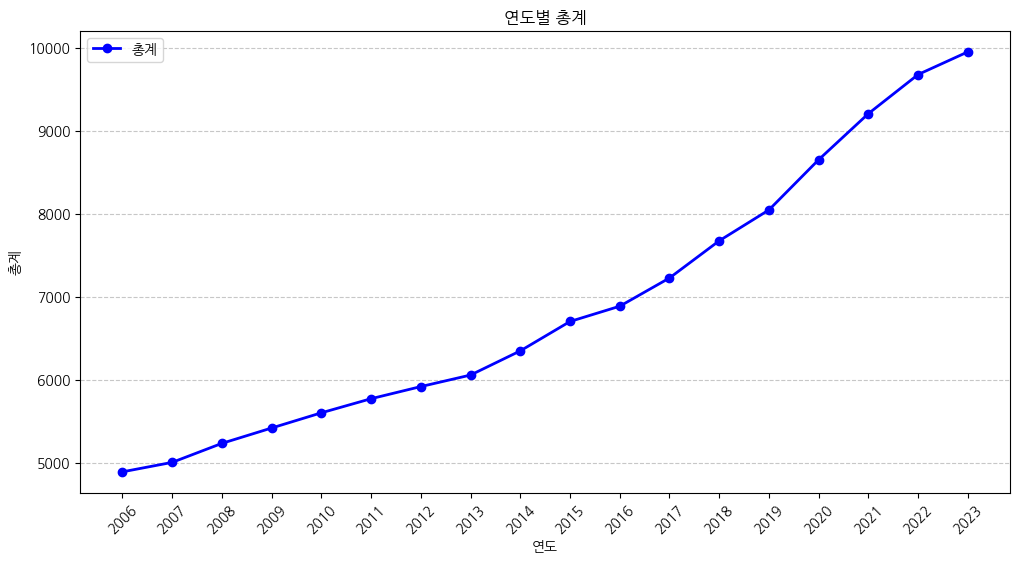

In [24]:
# 꺾은선 그래프 (총계만 표시)
plt.figure(figsize=(12, 6))

# 총계 꺾은선 그래프
plt.plot(shDF_filtered['연도'], shDF_filtered['총계'], marker='o', color='blue', linestyle='-', linewidth=2, label='총계')

plt.xlabel('연도')
plt.ylabel('총계')
plt.title('연도별 총계')
plt.xticks(shDF_filtered['연도'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

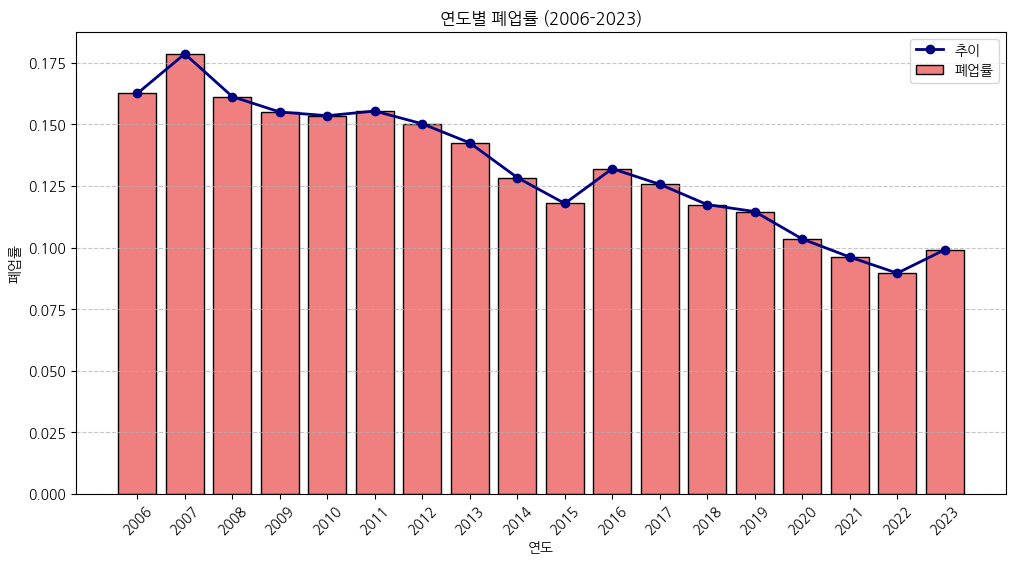

In [ ]:
# '총계'와 '폐업' 컬럼의 데이터 타입 변환 (문자열 → 숫자)
shDF['총계'] = shDF['총계'].astype(str).str.replace(',', '').astype(int)
shDF['폐업'] = shDF['폐업'].astype(str).str.replace(',', '').astype(int)

# '폐업률' 계산 (폐업 / 총계)
shDF['폐업률'] = shDF['폐업'] / shDF['총계']

# 연도 범위를 2006~2023으로 필터링
shDF_filtered = shDF[(shDF['연도'] >= 2006) & (shDF['연도'] <= 2023)]

# 바 그래프 + 꺾은선 그래프 시각화
plt.figure(figsize=(12, 6))

# 바 그래프
plt.bar(shDF_filtered['연도'], shDF_filtered['폐업률'], color='lightcoral', edgecolor='black', label='폐업률')

# 꺾은선 그래프
plt.plot(shDF_filtered['연도'], shDF_filtered['폐업률'], marker='o', color='navy', linestyle='-', linewidth=2, label='추이')

plt.xlabel('연도')
plt.ylabel('폐업률')
plt.title('연도별 폐업률 (2006-2023)')
plt.xticks(shDF_filtered['연도'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()